In [1]:
from typing import Type, List, Tuple
from datetime import datetime
from collections import defaultdict, OrderedDict
import math

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import re
import requests
from bs4 import BeautifulSoup
import QuantLib as ql

In [3]:
# Importing call options data
def fetch_option_data(ticker: Type[str], expiration_date: Type[datetime]) -> pd.DataFrame:
    """
    Fetches the options data from yahoo finance.
    
    Input
    -----
    ticker: Stock's ticker.
    expiration_date: The option's expiry date.
    """
    option = yf.Ticker(ticker)
    expiration_date = expiration_date.strftime('%Y-%m-%d')
    options = option.option_chain(expiration_date)
    df = options.calls
    return df

In [4]:
expiration_date = datetime(2024, 3, 15)
option_data = fetch_option_data("MSFT", expiration_date)

In [5]:
option_data.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,MSFT240315C00140000,2023-12-29 17:44:37+00:00,140.0,235.20,226.85,230.1,0.0,0.0,1.0,32,1.071782,True,REGULAR,USD
1,MSFT240315C00145000,2023-09-22 15:53:18+00:00,145.0,177.30,182.75,186.0,0.0,0.0,10.0,7,0.000010,True,REGULAR,USD
2,MSFT240315C00150000,2023-11-28 19:40:41+00:00,150.0,233.30,224.35,228.8,0.0,0.0,3.0,6,1.687379,True,REGULAR,USD
3,MSFT240315C00160000,2023-11-22 19:26:23+00:00,160.0,220.78,214.05,217.2,0.0,0.0,1.0,11,1.531619,True,REGULAR,USD
4,MSFT240315C00170000,2023-09-25 13:46:46+00:00,170.0,150.25,171.30,174.7,0.0,0.0,2.0,1,0.000010,True,REGULAR,USD


In [6]:
option_data.tail()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
73,MSFT240315C00520000,2023-12-20 15:24:18+00:00,520.0,0.15,0.03,0.07,0.00,0.000000,1.0,141,0.299812,False,REGULAR,USD
74,MSFT240315C00525000,2023-12-14 18:30:01+00:00,525.0,0.11,0.03,0.06,0.00,0.000000,221.0,1437,0.302741,False,REGULAR,USD
75,MSFT240315C00530000,2024-01-04 15:55:28+00:00,530.0,0.05,0.02,0.05,0.00,0.000000,1.0,646,0.304694,False,REGULAR,USD
76,MSFT240315C00535000,2024-01-02 14:37:35+00:00,535.0,0.07,0.02,0.05,0.00,0.000000,1.0,467,0.310554,False,REGULAR,USD
77,MSFT240315C00540000,2024-01-05 18:14:45+00:00,540.0,0.04,0.01,0.05,0.01,33.333336,401.0,5046,0.318366,False,REGULAR,USD


In [7]:
def get_expiration_dates(symbol):
    """
    Retrieve expiration dates for options associated with the provided symbol from Yahoo Finance.

    Parameters:
    symbol (str): The stock symbol for which expiration dates are to be fetched.

    Returns:
    list: A list of datetime objects representing expiration dates.
    """

    url = f"https://finance.yahoo.com/quote/{symbol}/options/"
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers)

    soup = BeautifulSoup(response.text, 'lxml')
    expiration_dates = soup.find_all('option')
    pattern = r"\w+ \d{1,2}\, \d{4}"
    required_dates = [re.search(pattern, date.text).group() for date in expiration_dates]
    date_format = "%B %d, %Y"
    required_dates = [datetime.strptime(date_str, date_format) for date_str in required_dates]
    return required_dates

In [8]:
expiration_dates = get_expiration_dates("MSFT")

In [9]:
def get_optimal_expiration_dates(ticker, expiration_dates):
    """
    Fetches the values of the dates that have at least 35 values in the dataframe.
    """
    option = yf.Ticker(ticker)
    result = []
    for expiration_date in expiration_dates:
        required_format = expiration_date.strftime('%Y-%m-%d')
        required_data = option.option_chain(required_format)
        df = required_data.calls
        if df.shape[0] >= 40:
            result.append(expiration_date)
        
    return result
    

In [10]:
optimal_dates = get_optimal_expiration_dates("MSFT", expiration_dates)

In [11]:
len(optimal_dates)

15

In [12]:
optimal_dates

[datetime.datetime(2024, 1, 12, 0, 0),
 datetime.datetime(2024, 1, 19, 0, 0),
 datetime.datetime(2024, 1, 26, 0, 0),
 datetime.datetime(2024, 2, 16, 0, 0),
 datetime.datetime(2024, 3, 15, 0, 0),
 datetime.datetime(2024, 4, 19, 0, 0),
 datetime.datetime(2024, 5, 17, 0, 0),
 datetime.datetime(2024, 6, 21, 0, 0),
 datetime.datetime(2024, 7, 19, 0, 0),
 datetime.datetime(2024, 9, 20, 0, 0),
 datetime.datetime(2024, 12, 20, 0, 0),
 datetime.datetime(2025, 1, 17, 0, 0),
 datetime.datetime(2025, 6, 20, 0, 0),
 datetime.datetime(2025, 12, 19, 0, 0),
 datetime.datetime(2026, 1, 16, 0, 0)]

In [13]:
def fetch_common_strikes(ticker, expiration_dates):
    """
    Fetches the highest occuring strikes in the option data.
    """
    option = yf.Ticker(ticker)
    frequency = defaultdict(int)
    for expiration_date in expiration_dates:
        expiration_date = expiration_date.strftime('%Y-%m-%d')
        required_data = option.option_chain(expiration_date)
        df = required_data.calls
        for strike_price in df["strike"]:
            frequency[strike_price] += 1
            
    sorted_freq = OrderedDict(sorted(frequency.items(), key=lambda x: x[1], reverse=True))
    result = []
    n = len(expiration_dates)
    for strike_price, frequency in sorted_freq.items():
        if frequency == n:
            result.append(strike_price)
            
    return result

In [14]:
most_occured_strikes = fetch_common_strikes("MSFT", optimal_dates)

In [15]:
def fetch_implied_volatilities(ticker, expiration_dates, strike_prices):
    """
    Fetches the values of implied volatility for each corresponding expiration dates
    
    Input
    -----
    ticker: Stock's ticker
    expiration_date: List of expiration_dates.
    strike_prices: List of strike prices
    """
    option = yf.Ticker(ticker)
    result = []
    for expiration_date in expiration_dates:
        expiration_date = expiration_date.strftime('%Y-%m-%d')
        required_data = option.option_chain(expiration_date)
        df = required_data.calls
        filtered_data = df[df['strike'].isin(strike_prices)]
        implied_vol_data = (filtered_data['impliedVolatility']).tolist()
        result.append(filtered_data['impliedVolatility'].tolist())
        
    return result
    

In [16]:
def get_stock_data_from_yahoo(ticker: Type[str], start: Type[datetime], end: Type[datetime]) -> pd.DataFrame:
    """
    Fetches the stock data from yahoo finance.
    
    Input
    -----
    ticker: Stock's ticker.
    start: Start of historical data
    end: End of historical data
    strike: The option's strike price.  
    """
    stock = yf.Ticker(ticker)
    stock_data = stock.history(start=start, end=end)["Close"]
    return stock_data

In [17]:
start = datetime(2023, 1, 1)
end = datetime.now()

In [18]:
stock_data = get_stock_data_from_yahoo("MSFT", start, end)

In [19]:
stock_data

Date
2023-01-03 00:00:00-05:00    237.474335
2023-01-04 00:00:00-05:00    227.086456
2023-01-05 00:00:00-05:00    220.356110
2023-01-06 00:00:00-05:00    222.953079
2023-01-09 00:00:00-05:00    225.123840
                                ...    
2023-12-29 00:00:00-05:00    376.040009
2024-01-02 00:00:00-05:00    370.869995
2024-01-03 00:00:00-05:00    370.600006
2024-01-04 00:00:00-05:00    367.940002
2024-01-05 00:00:00-05:00    367.750000
Name: Close, Length: 254, dtype: float64

In [20]:
# Calculating the dynamics of the stock prices.
def calculate_dynamics(stock_data: Type[np.ndarray]) -> Tuple[float, float, float]:
    """
    Function to calculate mean, standard deviation, and the current stock_price.
    
    Input
    -----
    stock_data: Historical price data
    
    Output
    ------
    current_price, mean, standard_deviation
    """
    current_price = stock_data[-1]
    stock_data = pd.Series(stock_data)
    returns = stock_data.pct_change()
    mean_returns = np.mean(returns)
    volatility = np.std(returns)
    return current_price, mean_returns, volatility
    

In [21]:
current_price, mean, volatility = calculate_dynamics(stock_data)

In [22]:
print(f"The current stock price of MSFT is {current_price} with an average daily return of {mean} and volatility of {volatility}")

The current stock price of MSFT is 367.75 with an average daily return of 0.0018528577727238964 and volatility of 0.015710108567333226


## Calibration using Heston's stochastic model 

The stochastic differential equation (SDE) governing the stock price dynamics:
\begin{align*}
dS(t) &= \mu S(t) dt + \sqrt{v(t)} S(t) dW_1(t)
\end{align*}

$S(t)$ is the stock price at time $t$.

$\mu$ is the drift rate of the stock price.

$v(t)$ is the stochastic volatility process.

$W_1(t)$ is a Wiener process representing the randomness in the stock price.


### Stochastic Volatility Dynamics (Cox-Ingersoll-Ross Process):

The stochastic differential equation for the volatility process:
\begin{align*}
dv(t) &= \kappa (\theta - v(t)) dt + \xi \sqrt{v(t)} dW_2(t)
\end{align*}
where:

$v(t)$ is the volatility at time $t$.

$\kappa$ is the mean reversion speed parameter.

$\theta$ is the long-term mean or equilibrium level of volatility.

$\xi$ is the volatility of the volatility (volatility of the variance).

$W_2(t)$ is another Wiener process, independent of $W_1(t)$

\textbf{Correlation between Wiener Processes:}

The correlation between the Wiener processes $W_1(t)$ and $W_2(t)$ is captured by a correlation parameter, typically denoted as $\rho$.

The Heston model dynamics involve these two coupled stochastic differential equations governing the evolution of the stock price and its volatility over time.


In [23]:
calculation_date = ql.Date(15, 12, 2023) # The date from which the spot price is picked up.
day_count = ql.Actual365Fixed()
calendar = ql.UnitedStates(ql.UnitedStates.Settlement)
ql.Settings.instance().evaluationDate = calculation_date
dividend_yield = ql.QuoteHandle(ql.SimpleQuote(0.0))
risk_free_rate = 0.05
dividend_rate = 0.00
flat_ts = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, risk_free_rate, day_count))
dividend_ts = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, dividend_rate, day_count))

In [24]:
required_expiration_dates = [ql.Date(date.day, date.month, date.year) for date in optimal_dates] # These dates are in the QuantLib's required format.

In [25]:
implied_volatility_data = fetch_implied_volatilities("MSFT", optimal_dates, most_occured_strikes) # Here we use the datetime version of expiration dates.

In [26]:
volatility_grid = ql.Matrix(len(most_occured_strikes), len(required_expiration_dates))
for i in range(volatility_grid.rows()):
    for j in range(volatility_grid.columns()):
        volatility_grid[i][j] = implied_volatility_data[j][i] # We are alloting row wise values for each corresponding strike prices.

In [27]:
black_var_surface = ql.BlackVarianceSurface(
    calculation_date, calendar, 
    required_expiration_dates, most_occured_strikes, 
    volatility_grid, day_count)


In [28]:
strikes_grid = np.linspace(most_occured_strikes[0], most_occured_strikes[-1],30)

In [29]:
expiry = 0.5 
implied_vols = [black_var_surface.blackVol(expiry, s) 
                for s in strikes_grid]

In [30]:
actual_data = implied_volatility_data[11]

ValueError: x and y must have same first dimension, but have shapes (30,) and (37,)

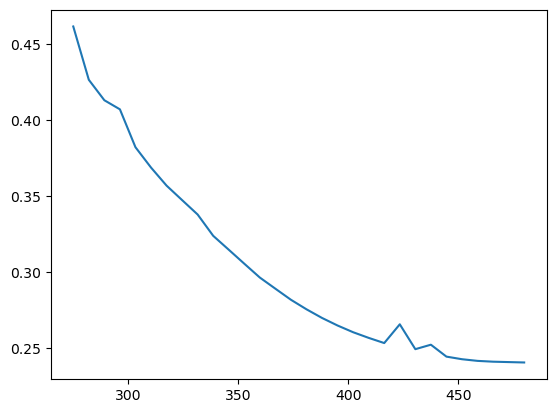

In [31]:
fig, ax = plt.subplots()
ax.plot(strikes_grid, implied_vols, label="Black Surface")
ax.plot(strikes_grid, actual_data, "o", label="Actual")
ax.set_xlabel("Strikes", size=12)
ax.set_ylabel("Vols", size=12)
legend = ax.legend(loc="upper right")
plot_years = np.arange(0, 2, 0.1)
plot_strikes = np.arange(most_occured_strikes[0], most_occured_strikes[-1], 1.0)
fig = plt.figure()

NameError: name 'plot_strikes' is not defined

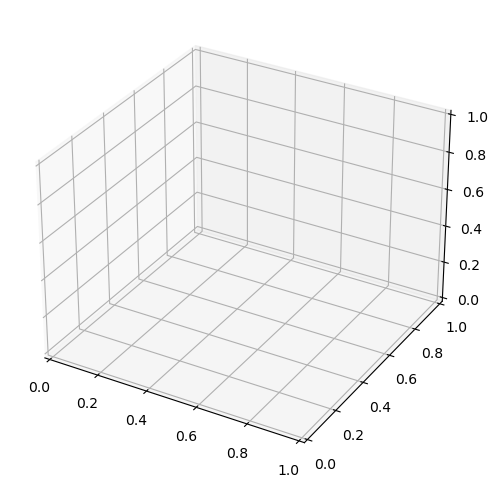

In [32]:
fig = plt.figure(figsize=(10, 6))  # Adjust figure size
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(plot_strikes, plot_years)

Z = np.array([[black_var_surface.blackVol(y, x) for x, y in zip(x_row, y_row)] for x_row, y_row in zip(X, Y)])

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)  # Remove linewidth and add antialiased
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('Strikes', fontsize=12)  # Set X-axis label
ax.set_ylabel('Years to Expiry', fontsize=12)  # Set Y-axis label
ax.set_zlabel('Volatility', fontsize=12)  # Set Z-axis label
ax.tick_params(labelsize=10)  # Adjust tick label size

plt.tight_layout()  # Improve layout spacing
plt.show()

#### Model Calibration

In [33]:
# Initial guesses for the model parameters
v0 = 0.01
kappa = 0.2
theta = 1.15
rho = -0.5
sigma = 0.24

In [34]:
process = ql.HestonProcess(flat_ts, dividend_ts, 
                           ql.QuoteHandle(ql.SimpleQuote(current_price)), 
                           v0, kappa, theta, sigma, rho)
model = ql.HestonModel(process)
engine = ql.AnalyticHestonEngine(model) 

In [45]:
heston_helpers = []
black_var_surface.setInterpolation("bicubic")
half_year_idx = 7 # 6th row in data is for 0.5 year expiry
date = ql.Date(optimal_dates[half_year_idx].day, optimal_dates[half_year_idx].month, optimal_dates[half_year_idx].year)
for j, s in enumerate(most_occured_strikes):
    t = (date - calculation_date)
    p = ql.Period(t, ql.Days)
    sigma = implied_volatility_data[half_year_idx][j]
    # sigma = black_var_surface.blackVol(t/365.25, s)
    helper = ql.HestonModelHelper(p, calendar, current_price, s, 
                                  ql.QuoteHandle(ql.SimpleQuote(sigma)),
                                  flat_ts, 
                                  dividend_ts)
    helper.setPricingEngine(engine)
    heston_helpers.append(helper)
lm = ql.LevenbergMarquardt(1e-8, 1e-8, 1e-8)
model.calibrate(heston_helpers, lm, 
                 ql.EndCriteria(500, 50, 1.0e-8,1.0e-8, 1.0e-8))
theta, kappa, sigma, rho, v0 = model.params()

print ("\ntheta = %f, kappa = %f, sigma = %f, rho = %f, v0 = %f" % (theta, kappa, sigma, rho, v0))


theta = 0.000000, kappa = 4.068873, sigma = 3.464875, rho = -0.599442, v0 = 0.559194


In [42]:
optimal_dates[7]

datetime.datetime(2024, 6, 21, 0, 0)

In [44]:
avg = 0.0
print ("%15s %15s %15s %20s" % (
    "Strikes", "Market Value", 
     "Model Value", "Relative Error (%)"))
print ("="*70)
for i, opt in enumerate(heston_helpers):
    err = (opt.modelValue()/opt.marketValue() - 1.0)
    print ("%15.2f %14.5f %15.5f %20.7f " % (
        most_occured_strikes[i], opt.marketValue(), 
        opt.modelValue(), 
        100.0*(opt.modelValue()/opt.marketValue() - 1.0)))
    avg += abs(err)
avg = avg*100.0/len(heston_helpers)
print ("-"*70)
print ("Average Abs Error (%%) : %5.3f" % (avg))

        Strikes    Market Value     Model Value   Relative Error (%)
         275.00       14.16844        11.72478          -17.2471685 
         280.00       13.04512        12.35035           -5.3258837 
         290.00       13.93453        13.69295           -1.7337290 
         295.00       15.80022        14.41367           -8.7755221 
         300.00       14.84937        15.17008            2.1597436 
         310.00       16.29153        16.79932            3.1169086 
         315.00       16.89210        17.67739            4.6488487 
         320.00       17.95864        18.60166            3.5805582 
         325.00       18.85013        19.57545            3.8478293 
         330.00       20.06864        20.60237            2.6595468 
         335.00       20.92233        21.68641            3.6520002 
         340.00       21.53788        22.83197            6.0084489 
         345.00       23.01815        24.04388            4.4561717 
         350.00       24.12973    

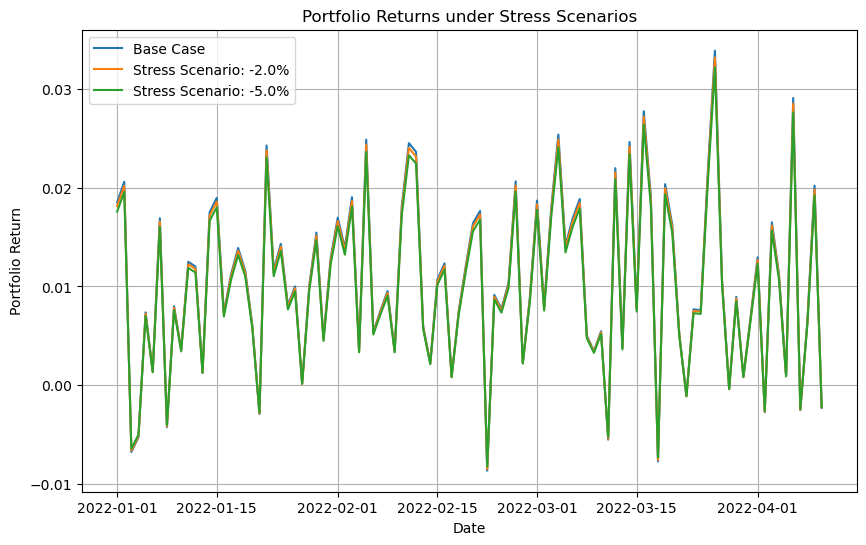

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample portfolio data
np.random.seed(42)
dates = pd.date_range(start='2022-01-01', periods=100)  # Sample dates
num_assets = 5
asset_returns = np.random.normal(0.01, 0.02, (100, num_assets))  # Generate random returns for 5 assets

# Create DataFrame with asset returns
asset_df = pd.DataFrame(asset_returns, index=dates, columns=[f"Asset_{i}" for i in range(1, num_assets + 1)])

# Calculate portfolio return
portfolio_weights = np.array([0.2, 0.3, 0.15, 0.2, 0.15])  # Sample portfolio weights
asset_df['Portfolio_Return'] = asset_df.dot(portfolio_weights)

# Define stress scenarios (change in returns)
stress_scenarios = [-0.02, -0.05]  # For instance, 2% and 5% negative return shocks

# Create a plot for base case
plt.figure(figsize=(10, 6))
plt.plot(asset_df['Portfolio_Return'], label='Base Case')

# Apply stress scenarios to asset returns and plot portfolio returns under each scenario
for scenario in stress_scenarios:
    stressed_asset_returns = asset_returns * (1 + scenario)
    stressed_asset_df = pd.DataFrame(stressed_asset_returns, index=dates, columns=[f"Asset_{i}" for i in range(1, num_assets + 1)])
    stressed_asset_df['Portfolio_Return'] = stressed_asset_df.dot(portfolio_weights)
    
    plt.plot(stressed_asset_df['Portfolio_Return'], label=f'Stress Scenario: {scenario * 100}%')

plt.title('Portfolio Returns under Stress Scenarios')
plt.xlabel('Date')
plt.ylabel('Portfolio Return')
plt.legend()
plt.grid(True)
plt.show()


In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have initial_returns, initial_cov_matrix, and stress_volatility_multiplier defined

# Generate random returns under normal scenario using Monte Carlo simulation
num_simulations = 1000
portfolio_values_normal = []

for i in range(num_simulations):
    normal_returns = np.random.multivariate_normal(initial_returns, initial_cov_matrix, 1)
    normal_returns = normal_returns.flatten()
    weights = np.array([1/len(initial_returns)] * len(initial_returns))
    portfolio_value_normal = np.dot(normal_returns, weights)
    portfolio_values_normal.append(portfolio_value_normal)

# Generate random returns under stress scenario using Monte Carlo simulation
portfolio_values_stress = []

for i in range(num_simulations):
    stress_returns = np.random.multivariate_normal(initial_returns, stress_cov_matrix, 1)
    stress_returns = stress_returns.flatten()
    weights = np.array([1/len(initial_returns)] * len(initial_returns))
    portfolio_value_stress = np.dot(stress_returns, weights)
    portfolio_values_stress.append(portfolio_value_stress)

# Plotting histograms for normal and stress scenarios
plt.figure(figsize=(10, 6))

plt.hist(portfolio_values_normal, bins=30, alpha=0.5, label='Normal Scenario', color='blue')
plt.hist(portfolio_values_stress, bins=30, alpha=0.5, label='Stress Scenario', color='red')

plt.title('Portfolio Value Distribution under Normal and Stress Scenarios')
plt.xlabel('Portfolio Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)


NameError: name 'initial_returns' is not defined